<a href="https://colab.research.google.com/github/HamzaRehan4/classification/blob/main/classification/blob/main/dog-and-cat-classification/l01c01_introduction_to_colab_and_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [18]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle

In [19]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout 

In [22]:
#creating generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

valid_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [23]:
#normalizing images so that we have same size of every image
def process(image, label):
  #all values will be betwwen 0 & 1
  image = tf.cast(image/255, tf.float32)
  return image,label

  train_dataset = train_dataset.map(process)
  valid_dataset = valid_dataset.map(process)

In [44]:
#Creating CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation ='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [46]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(train_dataset, epochs = 10, validation_data = valid_dataset)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.1243 - accuracy: 0.6052 - val_loss: 0.6081 - val_accuracy: 0.6684
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5322 - accuracy: 0.7324 - val_loss: 0.4714 - val_accuracy: 0.7740
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4579 - accuracy: 0.7855 - val_loss: 0.4600 - val_accuracy: 0.7926
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4038 - accuracy: 0.8155 - val_loss: 0.4202 - val_accuracy: 0.8112
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3198 - accuracy: 0.8609 - val_loss: 0.6338 - val_accuracy: 0.7022
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2459 - accuracy: 0.8974 - val_loss: 0.5126 - val_accuracy: 0.7990
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1743 - accuracy: 0.9320 - val_loss: 0.9146 - val_ac

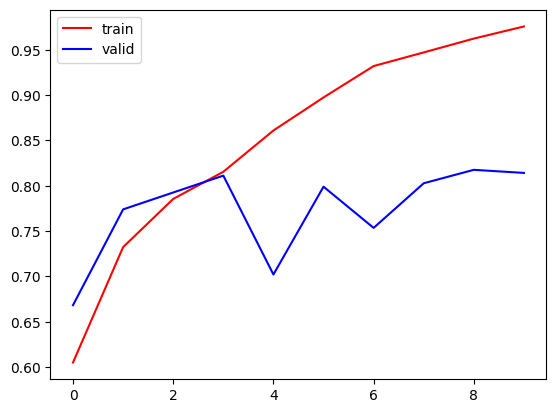

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='valid')
plt.legend()
plt.show()

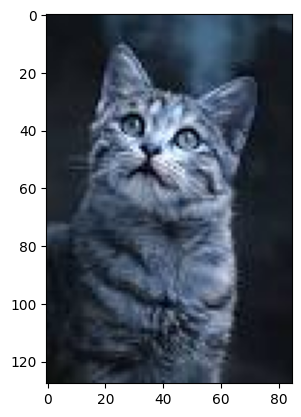

In [74]:
import cv2
image = cv2.imread('/content/cat.jpg')
plt.imshow(image)

In [76]:
image.shape

(128, 85, 3)

In [77]:
image = cv2.resize(image, (256,256))

In [78]:
#passing image in the form of a batch
test_image = image.reshape((1,256,256,3))

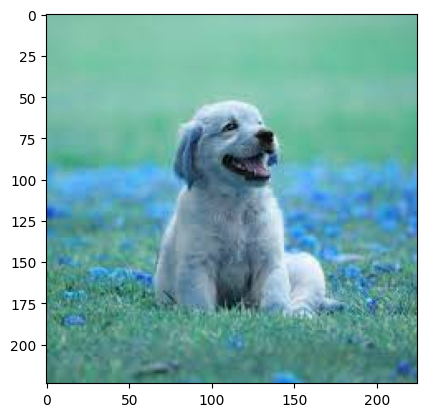

In [79]:
image2 = cv2.imread('/content/dog.jpg')
plt.imshow(image2)

In [80]:
image2.shape

(224, 225, 3)

In [81]:
image2 = cv2.resize(image2, (256, 256))

In [82]:
image_test2 = image.reshape((1, 256, 256, 3))

In [84]:
model.predict(image_test2)

1/1 [==============================] - 0s 72ms/step


array([[0.05611441]], dtype=float32)

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
